# Relacion del tamanio del estado con la pobreza

Se ha seleccionado un set de datos del Banco Mundial de 62 países con las siguientes instancias:
1.	Life expectancy at birth, total (years)
2.	Lower secondary completion rate, total (% of relevant age group)
3.	School enrollment, secondary (% net)
4.	Expense (% of GDP) 
5.	Compensation of employees (% of expense)
6.	Tax revenue (% of GDP)
7.	Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)
8.	Labor force with advanced education (% of total working-age population with advanced education)
9.	Labor force participation rate, total (% of total population ages 15+) (national estimate)
10.	Labor force with basic education (% of total working-age population with basic education)
11.	Labor force with intermediate education (% of total working-age population with intermediate education)
12.	Net lending (+) / net borrowing (-) (% of GDP)
13.	Poverty headcount ratio at national poverty lines (% of population)
14.	Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
15.	Life expectancy at birth, total (years)

Primeramente procedemos a cargar las librerias necesarias:

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import csv
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline 

Cargamos el set de datos, reemplazamos los valores no validos por NaN y configuramos todas las columnas de tipo numericas:

In [2]:
N_Paises = 62
N_Instancias = 14
Pais_Data = [0]*N_Paises
Paises_Data = pd.read_csv("62_Paises_Data.csv")
Paises_Data = pd.DataFrame(data=Paises_Data)
for i in range(N_Paises-1):
    Pais_Data[i]=Paises_Data[i*N_Instancias:N_Instancias*(i+1)]
    Pais_Data[i] = Pais_Data[i].T
    new_header = Pais_Data[i].iloc[2]
    Pais_Data[i] = Pais_Data[i][4:]
    Pais_Data[i].columns = new_header
    Pais_Data[i].replace(to_replace="..", value = np.nan, inplace = True)
    index = 0
    for column in Pais_Data[i].columns:
        if index>0:
            Pais_Data[i][column] = pd.to_numeric(Pais_Data[i][column])
        index = index + 1
Pais_Data[1].head()

Series Name,"Life expectancy at birth, total (years)","Lower secondary completion rate, total (% of relevant age group)","School enrollment, secondary (% net)",Expense (% of GDP),Compensation of employees (% of expense),Tax revenue (% of GDP),"Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)",Labor force with advanced education (% of total working-age population with advanced education),"Labor force participation rate, total (% of total population ages 15+) (national estimate)",Labor force with basic education (% of total working-age population with basic education),Labor force with intermediate education (% of total working-age population with intermediate education),Net lending (+) / net borrowing (-) (% of GDP),Poverty headcount ratio at national poverty lines (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
1996 [YR1996],78.0780487804878,NaN,89.08954,NaN,NaN,NaN,71.844002,NaN,63.520000,NaN,NaN,NaN,NaN,NaN
1997 [YR1997],78.4804878048781,NaN,NaN,NaN,NaN,NaN,70.266998,NaN,63.123199,NaN,NaN,NaN,NaN,NaN
1998 [YR1998],78.6317073170732,NaN,NaN,NaN,NaN,NaN,70.008003,NaN,62.997700,NaN,NaN,NaN,NaN,NaN
1999 [YR1999],78.9317073170732,NaN,NaN,24.567800,12.134817,22.475211,69.961998,NaN,62.764000,NaN,NaN,0.553423,NaN,NaN
2000 [YR2000],79.2341463414634,NaN,NaN,24.083919,10.722024,23.076900,70.161003,NaN,63.138100,NaN,NaN,2.013736,NaN,NaN


Dado que la naturaleza de los fenomenos sociales de los paises tienden todos a cambiar suavemente entre un anio y el siguiente (salvo excepciones en casos de guerras, pestes, etc) se decide realizar la interpolacion hacia adelante y hacia atras, y si no se puede entonces llenar hacia adelante y hacia atras con los valores mas cercanos.

In [3]:
for i in range(N_Paises-1):
    Pais_Data[i] = Pais_Data[i].interpolate(method='linear', limit_direction='both')
    for column in Pais_Data[i].columns:
        if Pais_Data[i][column].isnull().sum() > 0 and Pais_Data[i][column].isnull().sum() < 25:
            Pais_Data[i][column].fillna(method='ffill', inplace=True)
        if Pais_Data[i][column].isnull().sum() > 0 and Pais_Data[i][column].isnull().sum() < 25:
            Pais_Data[i][column].fillna(method='bfill', inplace=True)
Pais_Data[1].head()

Series Name,"Life expectancy at birth, total (years)","Lower secondary completion rate, total (% of relevant age group)","School enrollment, secondary (% net)",Expense (% of GDP),Compensation of employees (% of expense),Tax revenue (% of GDP),"Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)",Labor force with advanced education (% of total working-age population with advanced education),"Labor force participation rate, total (% of total population ages 15+) (national estimate)",Labor force with basic education (% of total working-age population with basic education),Labor force with intermediate education (% of total working-age population with intermediate education),Net lending (+) / net borrowing (-) (% of GDP),Poverty headcount ratio at national poverty lines (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
1996 [YR1996],78.0780487804878,NaN,89.089540,24.567800,12.134817,22.475211,71.844002,86.720001,63.520000,66.360001,82.540001,0.553423,NaN,1.3
1997 [YR1997],78.4804878048781,NaN,89.307886,24.567800,12.134817,22.475211,70.266998,86.720001,63.123199,66.360001,82.540001,0.553423,NaN,1.3
1998 [YR1998],78.6317073170732,NaN,89.526233,24.567800,12.134817,22.475211,70.008003,86.720001,62.997700,66.360001,82.540001,0.553423,NaN,1.3
1999 [YR1999],78.9317073170732,NaN,89.744579,24.567800,12.134817,22.475211,69.961998,86.720001,62.764000,66.360001,82.540001,0.553423,NaN,1.3
2000 [YR2000],79.2341463414634,NaN,89.962925,24.083919,10.722024,23.076900,70.161003,86.720001,63.138100,66.360001,82.540001,2.013736,NaN,1.3


Una tranformacion de salarios publicos en funcion del PBI es necesaria puesto que la otra columna referente al gasto publico esta dada en referencia a dicho parametro, por lo tanto, son 2 escalas distintas y en el siguiente paso son homologadas:

In [4]:
for i in range(N_Paises-1):
    Pais_Data[i]["Compensation of employees (% of expense)"]= \
    Pais_Data[i]["Compensation of employees (% of expense)"]*Pais_Data[i]["Expense (% of GDP)"]/100
Pais_Data[1].head()

Series Name,"Life expectancy at birth, total (years)","Lower secondary completion rate, total (% of relevant age group)","School enrollment, secondary (% net)",Expense (% of GDP),Compensation of employees (% of expense),Tax revenue (% of GDP),"Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)",Labor force with advanced education (% of total working-age population with advanced education),"Labor force participation rate, total (% of total population ages 15+) (national estimate)",Labor force with basic education (% of total working-age population with basic education),Labor force with intermediate education (% of total working-age population with intermediate education),Net lending (+) / net borrowing (-) (% of GDP),Poverty headcount ratio at national poverty lines (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
1996 [YR1996],78.0780487804878,NaN,89.089540,24.567800,2.981257,22.475211,71.844002,86.720001,63.520000,66.360001,82.540001,0.553423,NaN,1.3
1997 [YR1997],78.4804878048781,NaN,89.307886,24.567800,2.981257,22.475211,70.266998,86.720001,63.123199,66.360001,82.540001,0.553423,NaN,1.3
1998 [YR1998],78.6317073170732,NaN,89.526233,24.567800,2.981257,22.475211,70.008003,86.720001,62.997700,66.360001,82.540001,0.553423,NaN,1.3
1999 [YR1999],78.9317073170732,NaN,89.744579,24.567800,2.981257,22.475211,69.961998,86.720001,62.764000,66.360001,82.540001,0.553423,NaN,1.3
2000 [YR2000],79.2341463414634,NaN,89.962925,24.083919,2.582284,23.076900,70.161003,86.720001,63.138100,66.360001,82.540001,2.013736,NaN,1.3


Algunas instancias para algunos paises quedaran con NaNs en toda la columna. Por ejemplo, anteriormente se muestra el caso de Australia cuya columna con estudiantes graduados de secundaria esta sin informacion.
Para estos casos y otros que se detallan en el siguiente codigo, se analizo la correlacion que existe contra un rubro que se le relaciona directamente, y se encontro que tienen relacion lineal como se muestra a continuacion:

<AxesSubplot:xlabel='School enrollment, secondary (% net)', ylabel='Lower secondary completion rate, total (% of relevant age group)'>

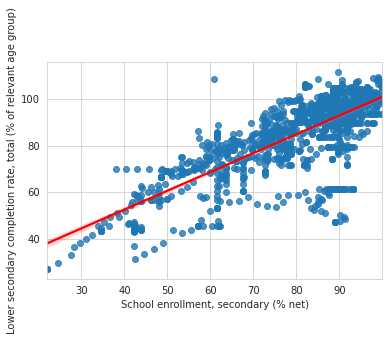

In [126]:
#Relacion de pares
Columna_Ingreso_Escolar = "School enrollment, secondary (% net)"
Columna_Secundaria_Completa = "Lower secondary completion rate, total (% of relevant age group)"

Columna_5USD_Por_Dia = "Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)"
Columna_Pobreza_L_Nacional = "Poverty headcount ratio at national poverty lines (% of population)"

#Aglomerado de datos
Eje_IE = pd.DataFrame({Columna_Ingreso_Escolar:Pais_Data[0][Columna_Ingreso_Escolar].values})
Eje_SC = pd.DataFrame({Columna_Secundaria_Completa:Pais_Data[0][Columna_Secundaria_Completa].values})
Eje_5PD = pd.DataFrame({Columna_5USD_Por_Dia:Pais_Data[0][Columna_5USD_Por_Dia].values})
Eje_PLN = pd.DataFrame({Columna_Pobreza_L_Nacional:Pais_Data[0][Columna_Pobreza_L_Nacional].values})
for i in range(N_Paises-1):
    if not Pais_Data[i][Columna_Ingreso_Escolar].isnull().values.any() and \
        not Pais_Data[i][Columna_Secundaria_Completa].isnull().values.any():
        Eje_IE = Eje_IE.append(pd.DataFrame({Columna_Ingreso_Escolar:Pais_Data[i][Columna_Ingreso_Escolar].values}), ignore_index=True)
        Eje_SC = Eje_SC.append(pd.DataFrame({Columna_Secundaria_Completa:Pais_Data[i][Columna_Secundaria_Completa].values}), ignore_index=True)

    if not Pais_Data[i][Columna_5USD_Por_Dia].isnull().values.any() and \
        not Pais_Data[i][Columna_Pobreza_L_Nacional].isnull().values.any():
        Eje_5PD = Eje_5PD.append(pd.DataFrame({Columna_5USD_Por_Dia:Pais_Data[i][Columna_5USD_Por_Dia].values}), ignore_index=True)
        Eje_PLN = Eje_PLN.append(pd.DataFrame({Columna_Pobreza_L_Nacional:Pais_Data[i][Columna_Pobreza_L_Nacional].values}), ignore_index=True)

#Regresion Lineal para cada caso
Escolaridad = Eje_SC
Escolaridad = Escolaridad.join(Eje_IE)
Regresion_de_Secundaria_Completa = LinearRegression()
Regresion_de_Secundaria_Completa.fit(Eje_IE, Eje_SC)

Pobreza = Eje_PLN
Pobreza = Pobreza.join(Eje_5PD)
Regresion_de_Pobreza_L_Nacional = LinearRegression()
Regresion_de_Pobreza_L_Nacional.fit(Eje_5PD, Eje_PLN)

#Solo ilustrativo
sns.regplot(x=Columna_Ingreso_Escolar, y=Columna_Secundaria_Completa, data=Escolaridad, line_kws={"color":"red"})
#sns.regplot(x=Columna_5USD_Por_Dia, y=Columna_Pobreza_L_Nacional, data=Pobreza, line_kws={"color":"red"})
#Y_prediccion=Regresion_de_Secundaria_Completa.predict(Eje_IE)
#plt.scatter(Eje_X, Eje_Y)
#plt.plot(Eje_X, Y_prediccion, color='red')
#plt.show()

Por lo tanto se decide rellenar los valores faltantes en estas columnas con los obtenidos por la regresion lineal de estas variables contra el valor predicho.

In [128]:
Columna_0_Pais_0 = Pais_Data[0].columns[0]
for instancia in Pais_Data[0].columns:
    Columnas_Agregadas = 0
    for i in range(N_Paises-55):
        if instancia == Columna_Secundaria_Completa: #Aca se llena el vacio de datos de Escolaridad completa
            if Pais_Data[i][instancia].isnull().values.any() and \
            not Pais_Data[i][Columna_Ingreso_Escolar].isnull().values.any():
                Y_prediccion=Regresion_de_Secundaria_Completa.predict(pd.DataFrame({Columna_Ingreso_Escolar:Pais_Data[i][Columna_Ingreso_Escolar].values}))
                for j in range(min(len(Y_prediccion), len(Pais_Data[i][instancia]))):
                    Pais_Data[i][instancia][j] = Y_prediccion[j,0]
        
        if instancia == Columna_Pobreza_L_Nacional: #Aca se llena el vacio de datos de Pobreza segun Linea Nacional
            if Pais_Data[i][instancia].isnull().values.any() and \
            not Pais_Data[i][Columna_5USD_Por_Dia].isnull().values.any():
                Y_prediccion=Regresion_de_Pobreza_L_Nacional.predict(pd.DataFrame({Columna_5USD_Por_Dia:Pais_Data[i][Columna_5USD_Por_Dia].values}))
                for j in range(min(len(Y_prediccion), len(Pais_Data[i][instancia]))):
                    Pais_Data[i][instancia][j] = Y_prediccion[j,0]
                    
        if i==0: #Aca se consolidan todos los datos limpios
            Columna = pd.DataFrame({instancia:Pais_Data[i][instancia].values})
            Columnas_Agregadas = Columnas_Agregadas + 1
        elif not Pais_Data[i][instancia].isnull().values.any():
            Columna = Columna.append(pd.DataFrame({instancia:Pais_Data[i][instancia].values}), ignore_index=True)
            Columnas_Agregadas = Columnas_Agregadas + 1
    if Columnas_Agregadas > 0:
        if(instancia==Columna_0_Pais_0):
            Consolidado = Columna
        else:
            Consolidado = Consolidado.join(Columna)
Consolidado

,"Life expectancy at birth, total (years)","Lower secondary completion rate, total (% of relevant age group)","School enrollment, secondary (% net)",Expense (% of GDP),Compensation of employees (% of expense),Tax revenue (% of GDP),"Labor force participation rate for ages 15-24, total (%) (modeled ILO estimate)",Labor force with advanced education (% of total working-age population with advanced education),"Labor force participation rate, total (% of total population ages 15+) (national estimate)",Labor force with basic education (% of total working-age population with basic education),Labor force with intermediate education (% of total working-age population with intermediate education),Net lending (+) / net borrowing (-) (% of GDP),Poverty headcount ratio at national poverty lines (% of population),Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
0,72.843,80.332611,74.40915,14.058801,2.182897,8.114915,45.258999,84.139000,59.500000,55.899101,67.503601,-3.981733,30.300000,26.3
1,73.029,80.332611,74.40915,14.058801,2.182897,8.114915,45.581001,84.139000,59.500000,55.899101,67.503601,-3.981733,30.300000,25.1
2,73.213,80.332611,74.40915,14.058801,2.182897,8.114915,45.870998,84.139000,59.900002,55.899101,67.503601,-3.981733,30.300000,27.9
3,73.396,80.332611,76.26566,14.058801,2.182897,8.114915,45.889000,84.139000,60.400002,55.899101,67.503601,-3.981733,30.300000,28.5
4,73.576,85.191040,78.48781,14.058801,2.182897,8.114915,46.057999,84.139000,57.720001,55.899101,67.503601,-3.981733,30.300000,31.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,75.23,71.750122,82.32779,36.459641,4.012834,13.686355,55.006001,81.660400,62.066898,48.568699,74.175499,-6.638531,23.834818,20.0
171,75.456,71.750122,81.72855,36.260700,4.212436,13.615781,55.798000,81.589302,62.359600,48.528000,74.389397,-8.078909,23.910461,20.2
172,75.672,71.750122,81.72855,36.025396,4.223338,14.178606,55.787998,81.124199,62.251801,47.874599,74.012802,-6.784714,23.759175,19.8
173,75.672,71.750122,81.72855,35.453513,4.213083,14.026313,55.749001,81.369301,62.610100,47.303699,74.457703,-5.464048,23.759175,19.8


Y para este punto tenemos los datos limpios y preprocesados